**B2**

Коцевич Андрей, Б02-920

In [4]:
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt

**1.** Напишите функцию, которая по заданному $p$ и вектору $\mathbf{x}$   вычисляет норму этого вектора:

$||\mathbf{x}||_p = (\sum\limits_{i = 1}^{n}|x_i|^p)^{\frac{1}{p}}$

Напишите вторую функцию, которая вычисляет подчинённую этой норме матричную норму данной матрицы, а также число обусловленности.

In [ ]:
def vector_p_norm(x, p): #векторная p-норма
  return (sum(abs(x) ** p)) ** (p ** -1)

def matrix_p_norm(M, p): #матричная p-норма
  n, m = M.shape
  N = 0
  for i in range(1000):
    v = np.random.uniform(-1, 1, size=[n, 1])
    N = max(N, vector_p_norm(M@v, p)/vector_p_norm(v, p))
  return(N)

M = np.array([[1, 1],[2, 5]])
print(matrix_p_norm(M, 1))

[5.99996188]


Значение $l_1$ близко к точному.

**2.** Напишите программу для вычисления нормы Фробениуса матрицы с помощью SVD разложения. В ходе экспериментов со случайными матрицами убедитесь в выполнении неравенств 

\begin{aligned}
&
&\frac{1}{\sqrt{n}}\|\mathbf{A}\|_{F} \leq\|\mathbf{A}\|_{2} \leq\|\mathbf{A}\|_{F}
\end{aligned}  

Запустите много экспериментов для матриц малой размерности. Вычислите среднее значение отношения спектральной нормы к норме Фробениуса. Проверьте экспериментально, как зависит это отношение от $n$.

In [ ]:
def frobenius_norm(M): #норма Фробениуса
    u, s, vh = np.linalg.svd(M)
    return np.sum(s ** 2) ** 0.5

In [ ]:
N = 10000
right_cases = 0
for i in range(N):
    n = np.random.randint(2, 10)
    M = np.random.uniform(-100, 100, size=[n, n])
    w, v = scipy.linalg.eig(M.T @ M)
    if n**(-0.5)*frobenius_norm(M) <= (np.max(np.abs(w)))**0.5 <= frobenius_norm(M):
        right_cases += 1
print(f"Равенство верно в {right_cases/N*100}% случаев")

Равенство верно в 100.0% случаев


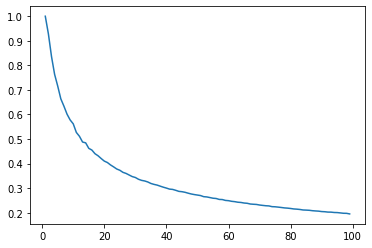

In [ ]:
N = 100
a = []
for i in range(1, N):
    b = 0
    for j in range(N):
        M = np.random.uniform(-100, 100, size=[i, i])
        w, v = scipy.linalg.eig(M.T @ M)
        b += (np.max(np.abs(w)))**0.5 / frobenius_norm(M)
    b /= N
    a.append(b)
plt.plot(np.array(range(1, N)), a)

Как видно, среднее значение отношения спектральной нормы к норме Фробениуса уменьшается при увеличении $n$.



**3.** Генерация случайных величин с заранее заданной ковариационной матрицей.   

Разложение Холецкого используется для генерации коррелированных между собой случайных величин. 
Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу? 

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).

Решение этой задачи делается с помощью разложения Холецкого.  Алгоритм заключается в следующем: 

1. Осуществить разложение Холецкого ковариационной матрицы: 
$\mathbf{Σ} = \mathbf{A} \mathbf{A}^{T} $
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением
3. Решением поставленной задачи будет вектор: 

      $\mathbf{x} = \mathbf{m} + \mathbf{Az}$

      Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.


Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.


In [ ]:
def random_number_generator(M): #генератор случайных величин с заданной ковариацией
    A = np.linalg.cholesky(M)
    n = M.shape[0]
    z = np.random.normal(0,1,n)
    return A@z
  
M = np.array([[1000,80,0],[0,10,0],[4,0,1]])
random_number_generator(M)

array([2.12890898, 1.22424618, 0.12091601])

**4.** Прокрустово преобразование.  

Цель задания - максимально хорошо "подогнать" одну фигуру под другую трансляцией плоскости и поворотом.

Пусть $\mathbf{X}_{1}$ и $\mathbf{X}_{2}-n \times 2$ матрицы, содержащие $n \ x, y$-координат точек первой и второй фигур соответственно. Задача сводится к минимизации "прокрустова расстояния" между фигурами $min(\vec{\mu}, \mathbf{R})\left\|\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \vec{\mu}^{T}\right)\right\|_{F}$, где 
$\|\mathbf{X}\|_{F}=\operatorname{tr}\left(\mathbf{X}^{T} \mathbf{X}\right)-$ норма Фробениуса, 

$\mathbf{R}-2 \times 2$ ортогональная матрица поворота, 

$\vec{\mu}$ - двумерный вектор трансляции в плоскости, 

$\mathbf{1}$ - столбец из $n$ единиц.


Пусть $\bar{x}_{1}, \bar{x}_{2}-$ двумерные векторы, содержащие среднее по каждому из двух столбцов матриц $\mathbf{X}_{1}$ и $\mathbf{X}_{2} .$ Центрируем $\mathbf{X}_{1}$ и $\mathbf{X}_{2}$ , то есть вычтем из них среднее по столбцам, и используем SVD:   

\begin{gathered}
\widetilde{\boldsymbol{X}}_{1}=\boldsymbol{X}_{\mathbf{1}}-\mathbf{1} \cdot \tilde{\mathrm{x}}_{1}^{\mathrm{T}}, \quad \widetilde{\boldsymbol{X}}_{2}=\boldsymbol{X}_{2}-\mathbf{1} \cdot \tilde{\mathrm{x}}_{2}^{\mathrm{T}}
 \\
 \widetilde{\boldsymbol{X}}_{1}^{\mathrm{T}} \widetilde{\boldsymbol{X}}_{2}=\mathbf{U D V}^{\mathrm{T}}
\end{gathered}

Тогда решение поставленной задачи даётся формулами:

$$
\vec{\mu}=\bar{x}_{2}-\mathbf{R}^{T} \bar{x}_{1}, \quad \mathbf{R}=\mathbf{U V}^{T}
$$

Используя эти формулы, напишите программу, которая подгоняет одну фигуру под другую и визуализирует результат. Постройте три частных примера - когда фигуры одинаковые, когда они отличаются незначительно и когда они отличаются сильно, чтобы показать результаты работы вашей программы.

In [7]:
def procrust_transform(A1, A2):
    mean1 = np.mean(A1, axis=0)
    mean2 = np.mean(A2, axis=0)
    A1new = A1 - mean1
    A2new = A2 - mean2
    u, s, vh = np.linalg.svd(A1new.T @ A2new)
    R = u @ vh
    mu = mean2 - R.T @ mean1
    A1trans = A1@R+mu
    x1 = A1[:, 0]
    y1 = A1[:, 1]
    x2 = A2[:, 0]
    y2 = A2[:, 1]
    X1 = A1trans[:, 0]
    Y1 = A1trans[:, 1]
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].scatter(x1, y1)
    axs[0].scatter(x2, y2)
    axs[1].scatter(X1, Y1)
    axs[1].scatter(x2, y2)
    plt.show()

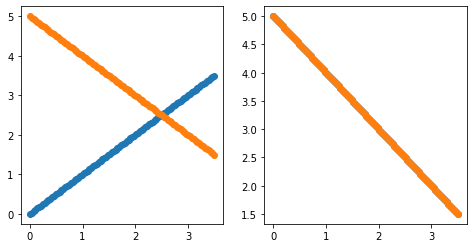

In [39]:
x = np.linspace(0, 3.5, 100)
y = x
M1 = np.vstack([x, y]).T
x = np.linspace(0, 3.5, 100)
y = -x+5
M2 = np.vstack([x, y]).T
procrust_transform(M1, M2)

Полное совпадение.

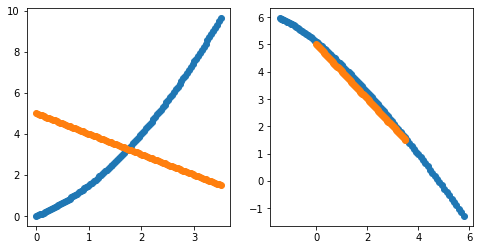

In [43]:
x = np.linspace(0, 3.5, 100)
y = x+0.5*x*x
M1 = np.vstack([x, y]).T
x = np.linspace(0, 3.5, 100)
y = -x+5
M2 = np.vstack([x, y]).T
procrust_transform(M1, M2)

Немного отличаются.

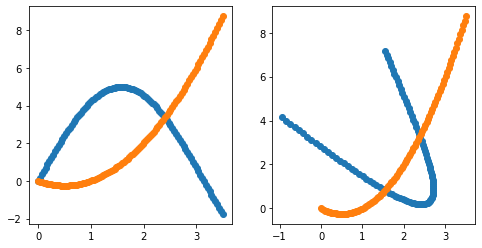

In [53]:
x = np.linspace(0, 3.5, 100)
y = 5*np.sin(x)
M1 = np.vstack([x, y]).T
x = np.linspace(0, 3.5, 100)
y = -x+x**2
M2 = np.vstack([x, y]).T
procrust_transform(M1, M2)

Сильное отличие.